In [36]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
battles = pd.read_csv("battles.csv")
char_deaths = pd.read_csv("character-deaths.csv")
char_pred = pd.read_csv("character-predictions.csv")

In [11]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [13]:
char_deaths.head()


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [14]:
char_pred.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [16]:
aka1 = battles[['attacker_king', 'attacker_1']]
aka2 = battles[['attacker_king', 'attacker_2']]
aka3 = battles[['attacker_king', 'attacker_3']]
aka4 = battles[['attacker_king', 'attacker_4']]
dkd1 = battles[['defender_king', 'defender_1']]
dkd2 = battles[['defender_king', 'defender_2']]
dkd3 = battles[['defender_king', 'defender_3']]
dkd4 = battles[['defender_king', 'defender_4']]


In [17]:
mat_list = [aka1, aka2, aka3, aka4, dkd1, dkd2, dkd3, dkd4]

In [19]:
for x in mat_list:
    x.columns = ['king', 'ally']

In [22]:
bk = pd.concat(mat_list,axis=0)

In [24]:
bk.dropna(inplace=True)

In [25]:
mx_df = pd.crosstab(bk.king, bk.ally)

In [28]:
kings_x_allies = mx_df.copy()`

In [29]:
allies_x_kings = mx_df.T.copy()

In [30]:
ally_adj = allies_x_`kings.dot(kings_x_allies).copy()


In [86]:
G = nx.from_numpy_matrix(ally_adj.values)
G = nx.relabel_nodes(G, dict(enumerate(ally_adj.columns)))

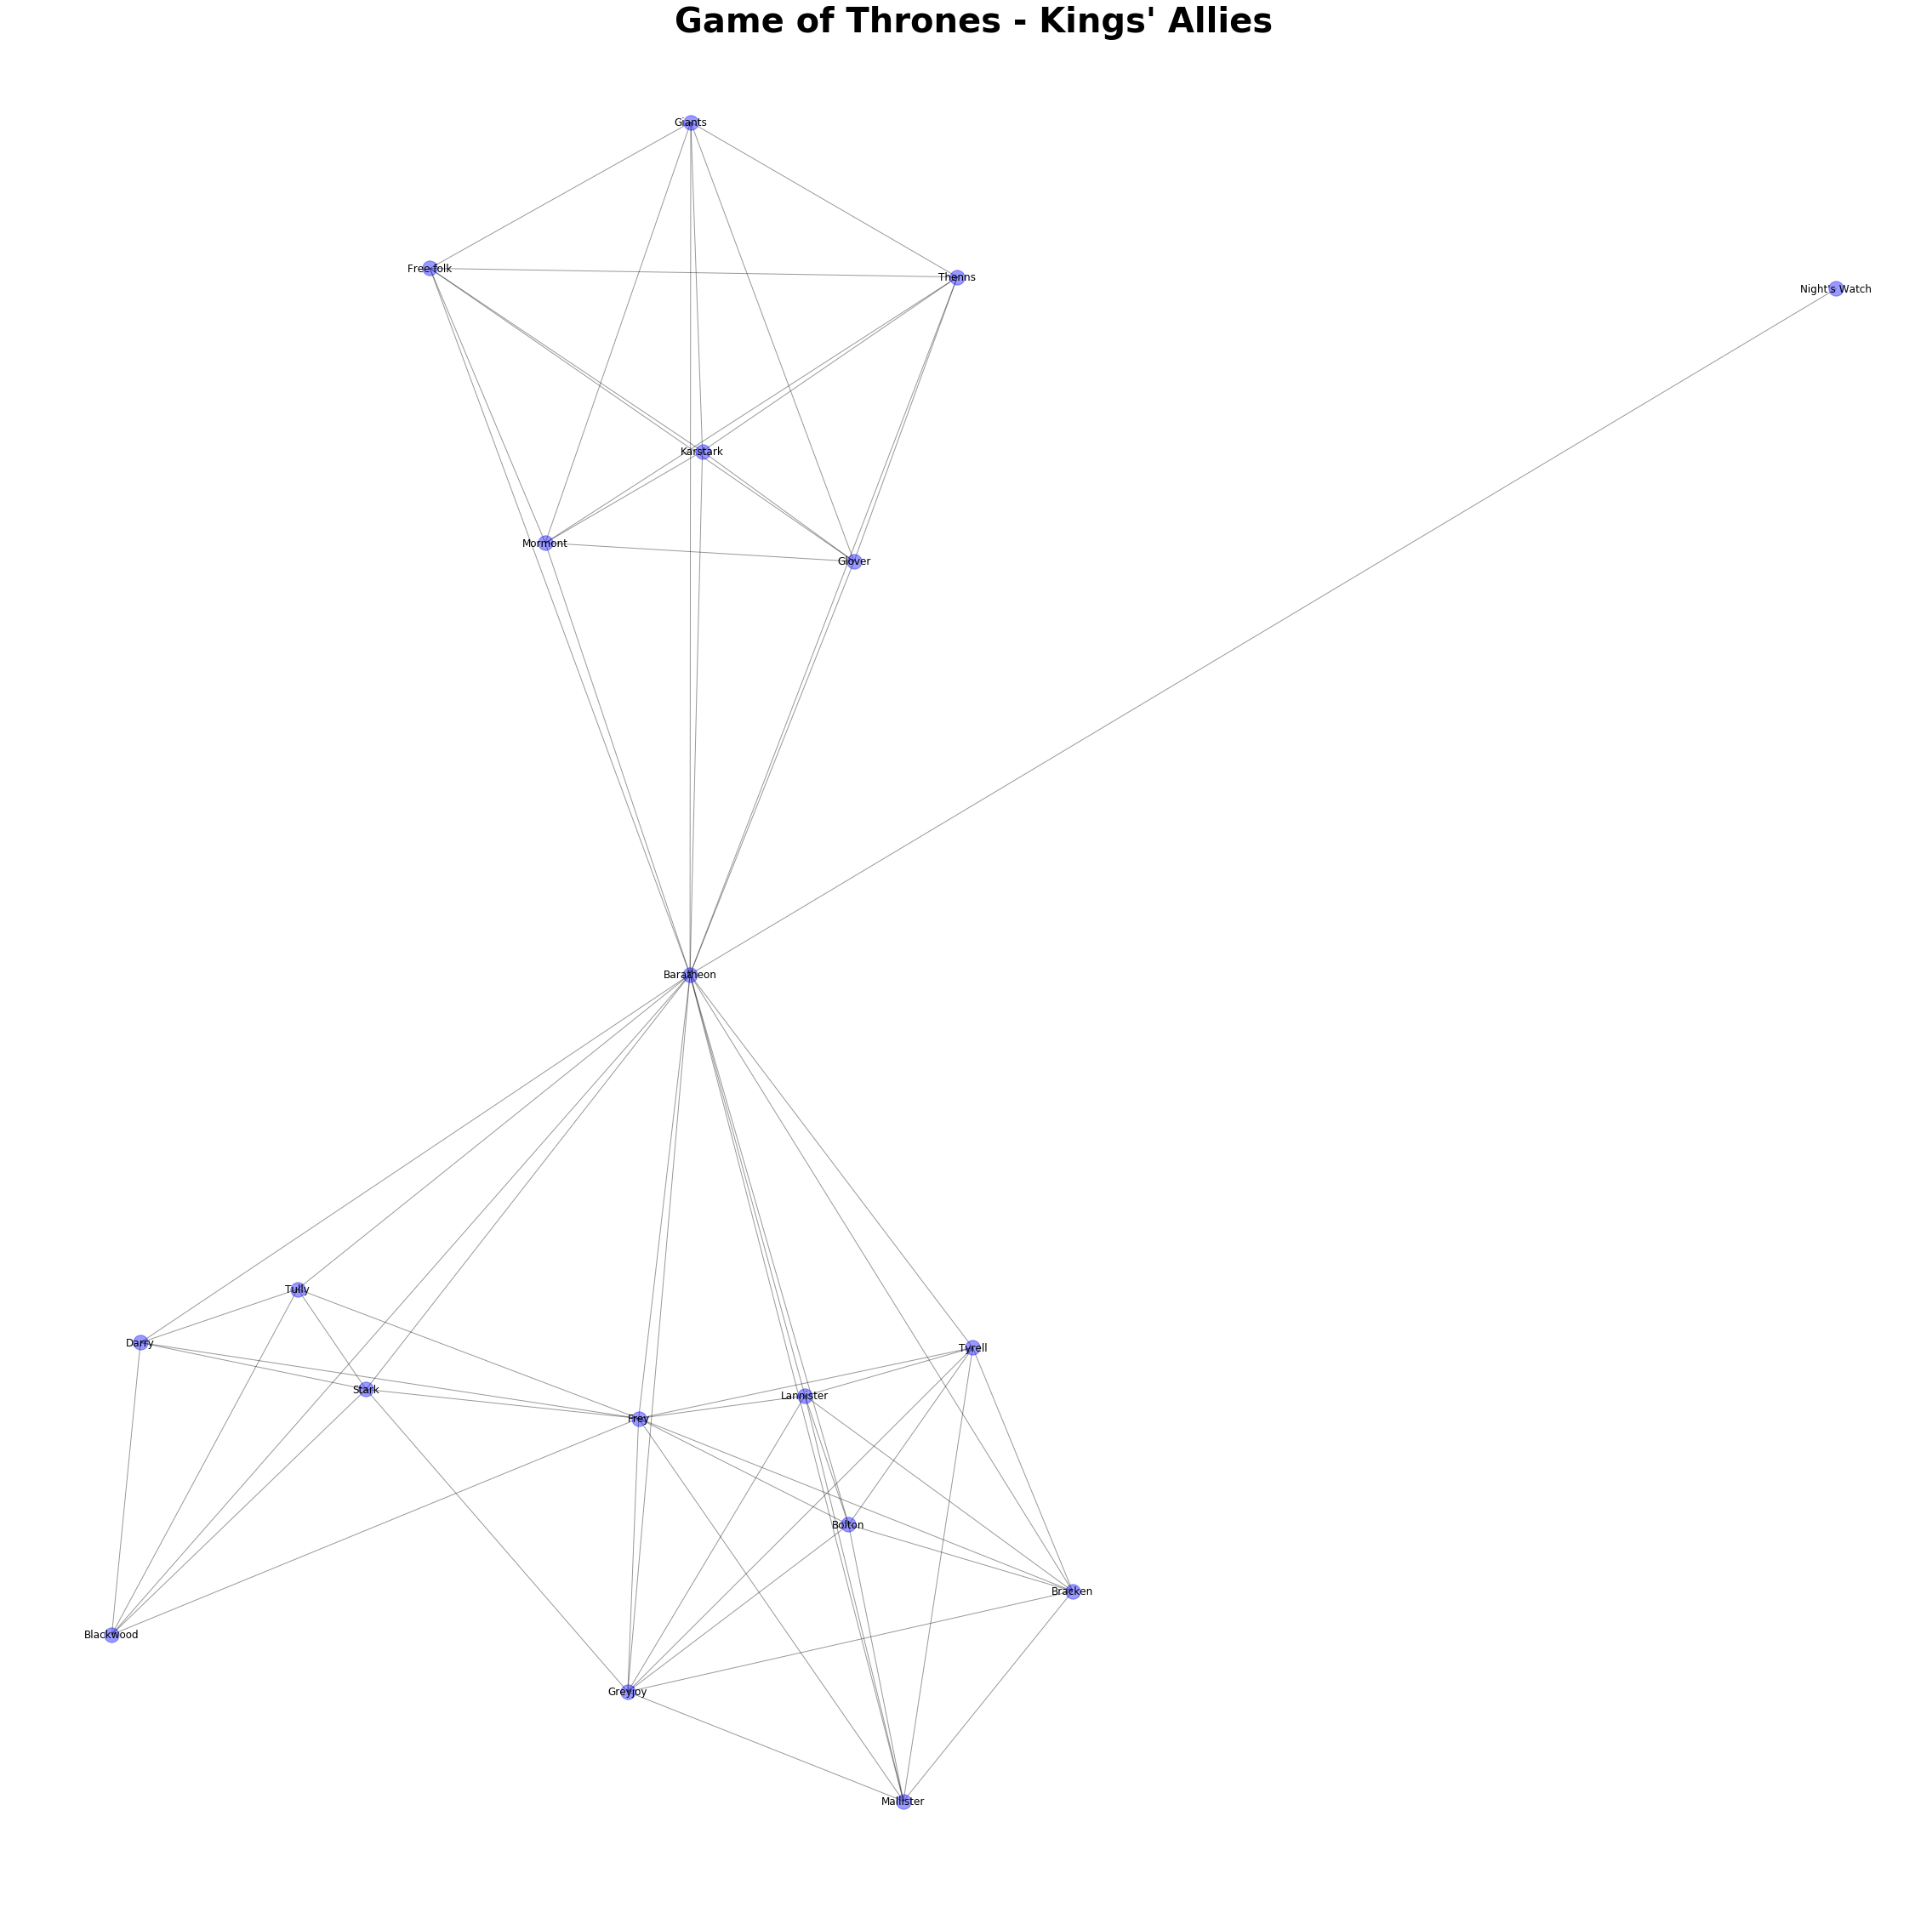

In [87]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5
                     , k=.3)
nx.draw_networkx_labels(G,pos,fontsize=12)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 40}
plt.title("Game of Thrones - Kings' Allies", font)


nx.draw_networkx_nodes(G,pos,node_color='blue',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [88]:
# get know , how strongly a king is backed by his allies
centrality=nx.eigenvector_centrality(G)
#|a-labmda|X = 0
#then relative score is sigma(x-target x adjajecy value)/lambda

In [91]:
loyalty_list = []
for node in centrality:
    loyalty_list.append((node,centrality[node]))
    
sorted(loyalty_list, key=lambda x: x[1], reverse=True)
# so the Baratheons have the most loyal backing by their king and the Night's watch are doomed, and neglected as all ways

[('Baratheon', 0.4449098772450081),
 ('Frey', 0.34149442086462917),
 ('Greyjoy', 0.28756044111024315),
 ('Bracken', 0.26606097948752333),
 ('Mallister', 0.26606097948752333),
 ('Lannister', 0.26606097948752333),
 ('Tyrell', 0.26606097948752333),
 ('Bolton', 0.26606097948752333),
 ('Stark', 0.19428053406459742),
 ('Tully', 0.16245858616659462),
 ('Darry', 0.16245858616659462),
 ('Blackwood', 0.16245858616659462),
 ('Giants', 0.1465238150001245),
 ('Karstark', 0.1465238150001245),
 ('Mormont', 0.1465238150001245),
 ('Free folk', 0.1465238150001245),
 ('Glover', 0.1465238150001245),
 ('Thenns', 0.1465238150001245),
 ("Night's Watch", 0.05536115587691574)]

In [92]:
king_adj = kings_x_allies.dot(allies_x_kings).copy()

In [101]:
G = nx.from_numpy_matrix(king_adj.values)
G = nx.relabel_nodes(G, dict(enumerate(king_adj.columns)))

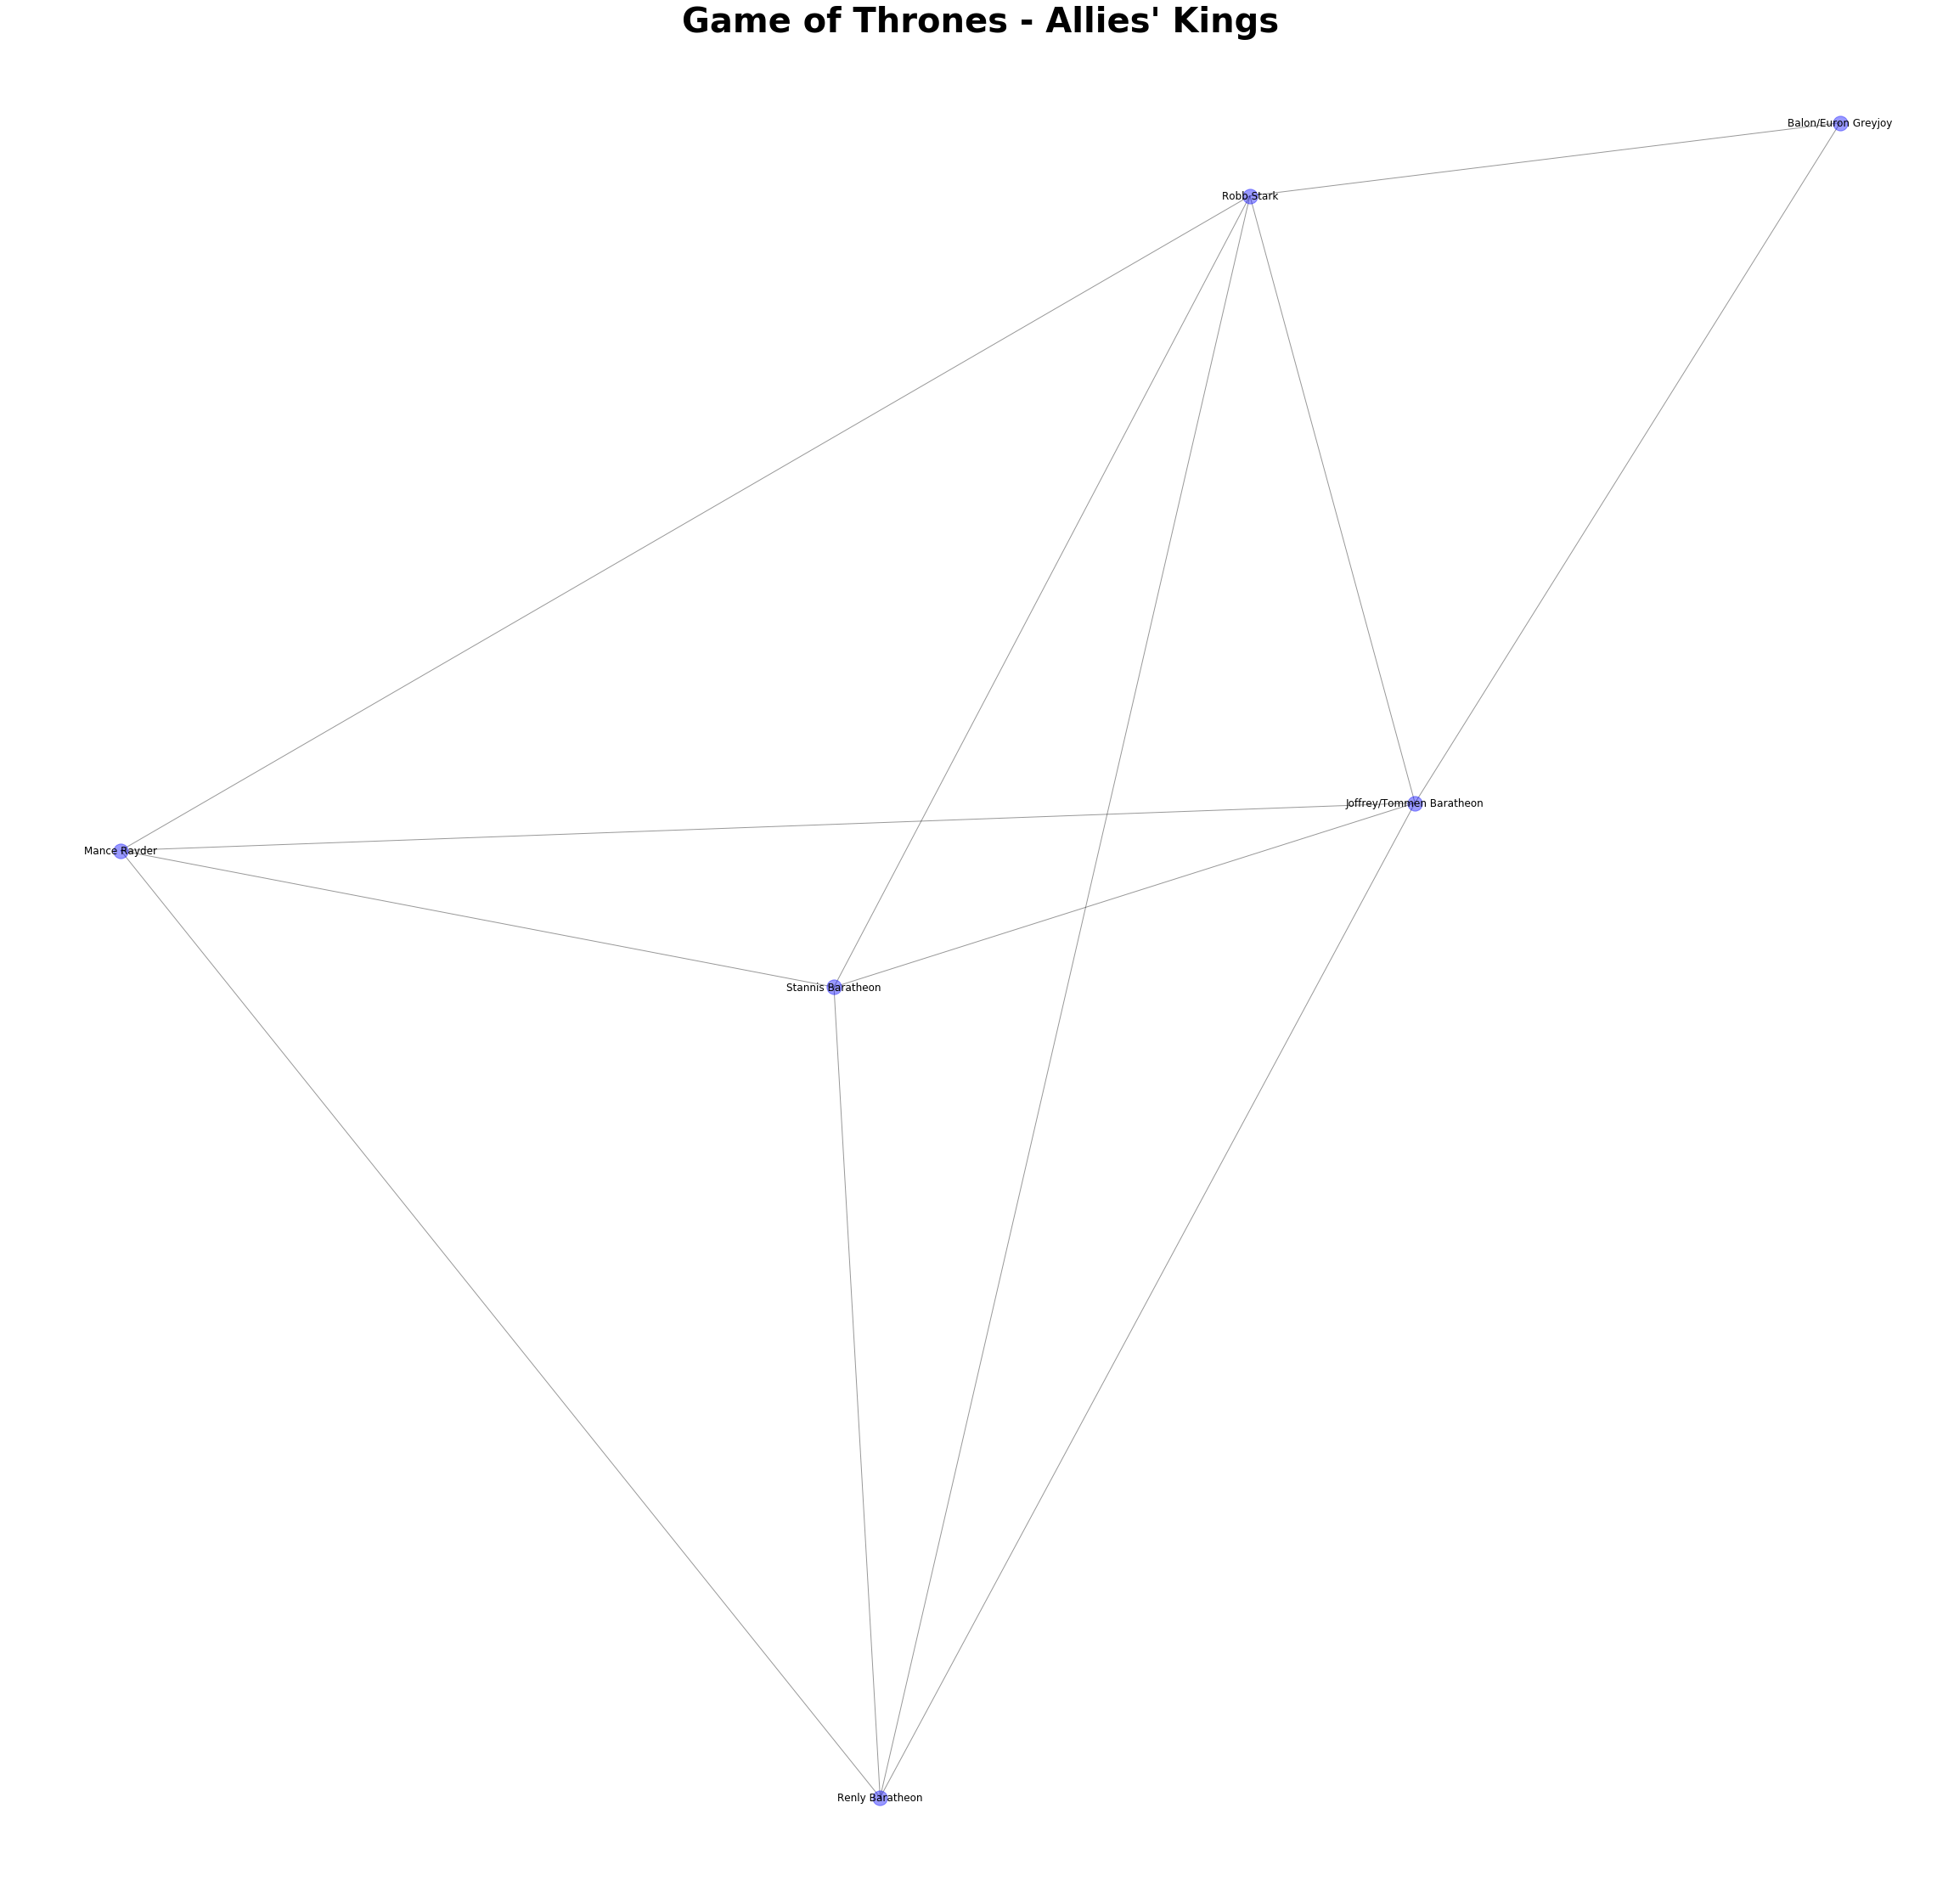

In [107]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=2
                     , k=.1)
nx.draw_networkx_labels(G,pos,fontsize=12)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 40}
plt.title("Game of Thrones - Allies' Kings", font)


nx.draw_networkx_nodes(G,pos,node_color='blue',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [108]:
centrality = nx.eigenvector_centrality(G)
loyalty_list = []
for node in centrality:
    loyalty_list.append((node,centrality[node]))
    
    
sorted(loyalty_list, key=lambda x: x[0], reverse=True)

#thus robert stark has the best backing from his allies

[('Stannis Baratheon', 0.41893468327003863),
 ('Robb Stark', 0.4611372761849126),
 ('Renly Baratheon', 0.41893468327003863),
 ('Mance Rayder', 0.41893468327003863),
 ('Joffrey/Tommen Baratheon', 0.4611372761849126),
 ('Balon/Euron Greyjoy', 0.21951313966552505)]